In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# 오버피팅 처리. IMDB 데이터

copy from https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko


In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비

In [3]:
NUM_WORDS = 1000

In [6]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.imdb.load_data(num_words=NUM_WORDS)

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [7]:
print(raw_train_x[:5])
print(raw_train_y[:5])

[list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207,

## 멀티-핫 인코딩

[1 3 5] 와 같은 데이터의 경우 1, 3, 5 인덱스만 1이고 나머지는 0으로 인코딩합니다.

```
[1 3 5] -> [0 1 0 1 0 1 0 0 0 0]   # WORD 길이가 10
```

본 예의 경우 NUM_WORDS가 1000이다.

1개의 데이터는 길이 1000의 벡터이며, 포함된 word 인덱스만 1인 값으로 인코딩 된다.

In [8]:
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (25000, 1000) 크기의 행렬. 25000은 데이터 갯수, 1000은 NUM_WORDS
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_x = multi_hot_sequences(raw_train_x, dimension=NUM_WORDS)
test_x = multi_hot_sequences(raw_test_x, dimension=NUM_WORDS)
train_y = raw_train_y
test_y = raw_test_y

In [ ]:
print(raw_train_x.shape)
print(raw_train_x[0])
print(train_x.shape)
print(train_x[0][:10])
print(train_x[0][10:20])
print(train_x[0][20:30])


(25000,)
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000, 1000)
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 0. 1. 1. 0. 1. 0.]


모델이 너무 크면 패턴의 '학습'이 아닌 개별 데이터를 '기억'한다.




# 모델 크기별 과적합

### 작은 모델

In [12]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy')

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
smaller_history = smaller_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 1s - loss: 0.6719 - val_loss: 0.6356
Epoch 2/20
22500/22500 - 0s - loss: 0.5874 - val_loss: 0.5398
Epoch 3/20
22500/22500 - 0s - loss: 0.4916 - val_loss: 0.4595
Epoch 4/20
22500/22500 - 0s - loss: 0.4205 - val_loss: 0.4060
Epoch 5/20
22500/22500 - 0s - loss: 0.3760 - val_loss: 0.3755
Epoch 6/20
22500/22500 - 0s - loss: 0.3494 - val_loss: 0.3617
Epoch 7/20
22500/22500 - 0s - loss: 0.3324 - val_loss: 0.3497
Epoch 8/20
22500/22500 - 0s - loss: 0.3213 - val_loss: 0.3433
Epoch 9/20
22500/22500 - 0s - loss: 0.3139 - val_loss: 0.3404
Epoch 10/20
22500/22500 - 0s - loss: 0.3080 - val_loss: 0.3408
Epoch 11/20
22500/22500 - 0s - loss: 0.3042 - val_loss: 0.3395
Epoch 12/20
22500/22500 - 0s - loss: 0.3014 - val_loss: 0.3369
Epoch 13/20
22500/22500 - 0s - loss: 0.2989 - val_loss: 0.3389
Epoch 14/20
22500/22500 - 0s - loss: 0.2958 - val_loss: 0.3369
Epoch 15/20
22500/22500 - 0s - loss: 0.2929 - val_loss: 0.3382
Epoch 16/20
225

### 기준 모델

In [10]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy')

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                16016     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
baseline_history = baseline_model.fit(train_x,
                                      train_y,
                                      epochs=20,
                                      batch_size=512,
                                      validation_split=0.1,
                                      verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 11s - loss: 0.5833 - val_loss: 0.4421
Epoch 2/20
22500/22500 - 0s - loss: 0.3769 - val_loss: 0.3539
Epoch 3/20
22500/22500 - 0s - loss: 0.3216 - val_loss: 0.3403
Epoch 4/20
22500/22500 - 0s - loss: 0.3056 - val_loss: 0.3374
Epoch 5/20
22500/22500 - 0s - loss: 0.2994 - val_loss: 0.3413
Epoch 6/20
22500/22500 - 0s - loss: 0.2929 - val_loss: 0.3403
Epoch 7/20
22500/22500 - 0s - loss: 0.2887 - val_loss: 0.3425
Epoch 8/20
22500/22500 - 0s - loss: 0.2848 - val_loss: 0.3449
Epoch 9/20
22500/22500 - 0s - loss: 0.2808 - val_loss: 0.3465
Epoch 10/20
22500/22500 - 0s - loss: 0.2748 - val_loss: 0.3521
Epoch 11/20
22500/22500 - 0s - loss: 0.2730 - val_loss: 0.3535
Epoch 12/20
22500/22500 - 0s - loss: 0.2685 - val_loss: 0.3615
Epoch 13/20
22500/22500 - 0s - loss: 0.2601 - val_loss: 0.3553
Epoch 14/20
22500/22500 - 0s - loss: 0.2595 - val_loss: 0.3724
Epoch 15/20
22500/22500 - 0s - loss: 0.2505 - val_loss: 0.3596
Epoch 16/20
22

### 큰 모델

In [14]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam', loss='binary_crossentropy')

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


역시 같은 데이터를 사용해 모델을 훈련합니다:

In [15]:
bigger_history = bigger_model.fit(train_x,
                                  train_y,
                                  epochs=20,
                                  batch_size=512,
                                  validation_split=0.1,
                                  verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 0s - loss: 0.4163 - val_loss: 0.3423
Epoch 2/20
22500/22500 - 0s - loss: 0.2954 - val_loss: 0.3426
Epoch 3/20
22500/22500 - 0s - loss: 0.2309 - val_loss: 0.3651
Epoch 4/20
22500/22500 - 0s - loss: 0.1305 - val_loss: 0.4110
Epoch 5/20
22500/22500 - 0s - loss: 0.0376 - val_loss: 0.5333
Epoch 6/20
22500/22500 - 0s - loss: 0.0078 - val_loss: 0.6288
Epoch 7/20
22500/22500 - 0s - loss: 0.0022 - val_loss: 0.6746
Epoch 8/20
22500/22500 - 0s - loss: 0.0010 - val_loss: 0.7205
Epoch 9/20
22500/22500 - 0s - loss: 6.5011e-04 - val_loss: 0.7513
Epoch 10/20
22500/22500 - 0s - loss: 4.6599e-04 - val_loss: 0.7748
Epoch 11/20
22500/22500 - 0s - loss: 3.5225e-04 - val_loss: 0.7970
Epoch 12/20
22500/22500 - 0s - loss: 2.7519e-04 - val_loss: 0.8153
Epoch 13/20
22500/22500 - 0s - loss: 2.2052e-04 - val_loss: 0.8334
Epoch 14/20
22500/22500 - 0s - loss: 1.8037e-04 - val_loss: 0.8491
Epoch 15/20
22500/22500 - 0s - loss: 1.4993e-04 - val_

## 로스 그래프

smaller


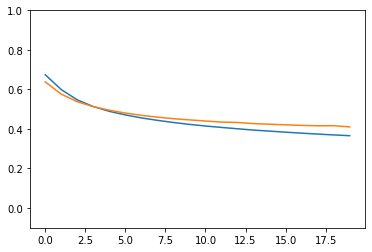

base


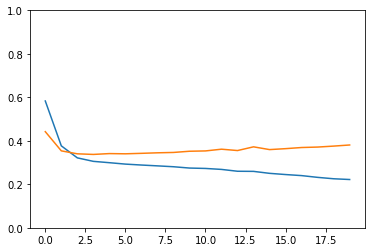

bigger


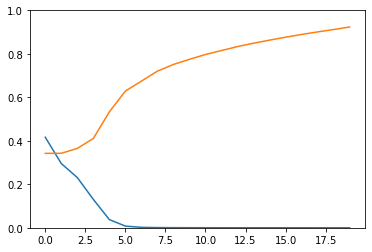

In [16]:
print("smaller")
plt.plot(smaller_history.history['loss'])
plt.plot(smaller_history.history['val_loss'])
plt.ylim((-0.1, 1.))
plt.show()

print("base")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("bigger")
plt.plot(bigger_history.history['loss'])
plt.plot(bigger_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()


모델이 클수록 오버피팅 발생이 일찍 온다

# 과적합 처리

## weight Regularization

In [17]:
ㅣ2_baseline_model = keras.Sequential([
    # keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,), kernel_regularizer=keras.regularizers.l2(0.001)),
    # keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

ㅣ2_baseline_model.compile(optimizer='adam', loss='binary_crossentropy')

ㅣ2_baseline_model.summary()

l2_baseline_history = ㅣ2_baseline_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 0s - loss: 0.6443 - val_loss: 0.4937
Epoch 2/20
22500/22500 - 0s - loss: 0.4235 - val_loss: 0.4042
Epoch 3/20
22500/22500 - 0s - loss: 0.3653 - val_loss: 0.3825
Epoch 4/20
22500/22500 - 0s - loss: 0.3501 - val_loss: 0.3827
Epoch 5/20
22500/22500 - 0s - loss: 0.3434 - val_loss: 0.3781
Epoch 6/20
22500/2250

In [21]:
ㅣ2_bigger_model = keras.Sequential([
    # keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,), kernel_regularizer=keras.regularizers.l2(0.001)),
    # keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

ㅣ2_bigger_model.compile(optimizer='adam', loss='binary_crossentropy')

ㅣ2_bigger_model.summary()

l2_bigger_history = ㅣ2_bigger_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 1s - loss: 1.2853 - val_loss: 0.8832
Epoch 2/20
22500/22500 - 0s - loss: 0.7122 - val_loss: 0.6462
Epoch 3/20
22500/22500 - 0s - loss: 0.5386 - val_loss: 0.5471
Epoch 4/20
22500/22500 - 0s - loss: 0.4566 - val_loss: 0.5185
Epoch 5/20
22500/22500 - 0s - loss: 0.3810 - val_loss: 0.5146
Epoch 6/20
22500/22

baseline


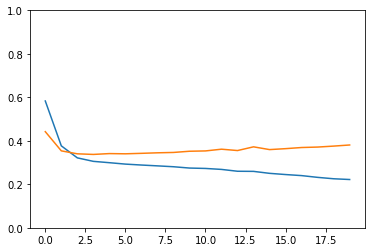

l2_baseline


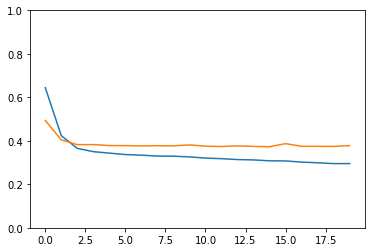

bigger


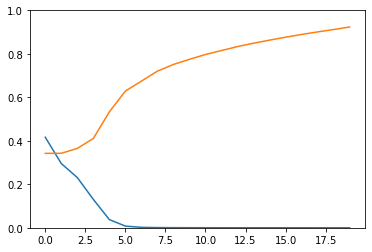

l2_bigger


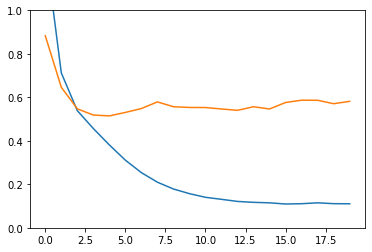

In [22]:
print("baseline")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("l2_baseline")
plt.plot(l2_baseline_history.history['loss'])
plt.plot(l2_baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("bigger")
plt.plot(bigger_history.history['loss'])
plt.plot(bigger_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("l2_bigger")
plt.plot(l2_bigger_history.history['loss'])
plt.plot(l2_bigger_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

발생하던 오버피팅이 완화되었다.

## Drop Out

In [19]:
dropout_baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),    # ADD
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),    # ADDD
    keras.layers.Dense(1, activation='sigmoid')
])


dropout_baseline_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dropout_baseline_history = dropout_baseline_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 0s - loss: 0.6735 - acc: 0.5667 - binary_crossentropy: 0.6735 - val_loss: 0.6082 - val_acc: 0.7624 - val_binary_crossentropy: 0.6082
Epoch 2/20
22500/22500 - 0s - loss: 0.5888 - acc: 0.6894 - binary_crossentropy: 0.5888 - val_loss: 0.4824 - val_acc: 0.8220 - val_binary_crossentropy: 0.4824
Epoch 3/20
22500/22500 - 0s - loss: 0.5014 - acc: 0.7616 - binary_crossentropy: 0.5014 - val_loss: 0.3986 - val_acc: 0.8436 - val_binary_crossentropy: 0.3986
Epoch 4/20
22500/22500 - 0s - loss: 0.4487 - acc: 0.7973 - binary_crossentropy: 0.4487 - val_loss: 0.3630 - val_acc: 0.8548 - val_binary_crossentropy: 0.3630
Epoch 5/20
22500/22500 - 0s - loss: 0.4164 - acc: 0.8144 - binary_crossentropy: 0.4164 - val_loss: 0.3512 - val_acc: 0.8560 - val_binary_crossentropy: 0.3512
Epoch 6/20
22500/22500 - 0s - loss: 0.3975 - acc: 0.8241 - binary_crossentropy: 0.3975 - val_loss: 0.3376 - val_acc: 0.8608 - val_binary_crossentropy: 0.3376
Epo

In [23]:
dropout_bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),    # ADD
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),    # ADDD
    keras.layers.Dense(1, activation='sigmoid')
])


dropout_bigger_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dropout_bigger_history = dropout_bigger_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 0s - loss: 0.5003 - acc: 0.7477 - binary_crossentropy: 0.5003 - val_loss: 0.3474 - val_acc: 0.8576 - val_binary_crossentropy: 0.3474
Epoch 2/20
22500/22500 - 0s - loss: 0.3345 - acc: 0.8595 - binary_crossentropy: 0.3345 - val_loss: 0.3315 - val_acc: 0.8596 - val_binary_crossentropy: 0.3315
Epoch 3/20
22500/22500 - 0s - loss: 0.2920 - acc: 0.8769 - binary_crossentropy: 0.2920 - val_loss: 0.3348 - val_acc: 0.8600 - val_binary_crossentropy: 0.3348
Epoch 4/20
22500/22500 - 0s - loss: 0.2544 - acc: 0.8954 - binary_crossentropy: 0.2544 - val_loss: 0.3419 - val_acc: 0.8580 - val_binary_crossentropy: 0.3419
Epoch 5/20
22500/22500 - 0s - loss: 0.2120 - acc: 0.9150 - binary_crossentropy: 0.2120 - val_loss: 0.3594 - val_acc: 0.8572 - val_binary_crossentropy: 0.3594
Epoch 6/20
22500/22500 - 0s - loss: 0.1562 - acc: 0.9414 - binary_crossentropy: 0.1562 - val_loss: 0.3988 - val_acc: 0.8540 - val_binary_crossentropy: 0.3988
Epo

baseline


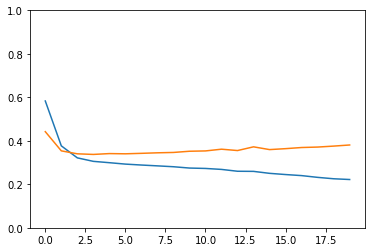

dropout_baseline


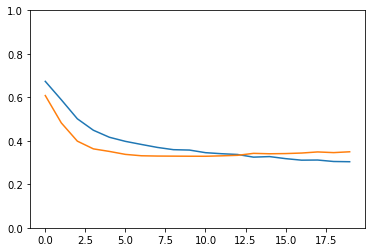

bigger


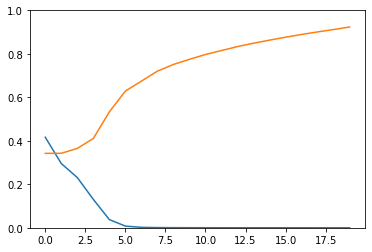

dropout_bigger


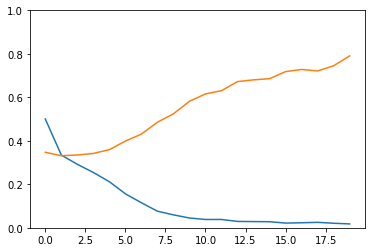

In [24]:
print("baseline")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("dropout_baseline")
plt.plot(dropout_baseline_history.history['loss'])
plt.plot(dropout_baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("bigger")
plt.plot(bigger_history.history['loss'])
plt.plot(bigger_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("dropout_bigger")
plt.plot(dropout_bigger_history.history['loss'])
plt.plot(dropout_bigger_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()